Try and find two catgeories that can be combined.

In [1]:
from pathlib import Path
# Load the softmax encodings of the data

from simcoder.similarity import load_mf_encodings

smData = load_mf_encodings(Path('/Volumes/Data/mf_resnet50_softmax'))

# Load the data

allData = load_mf_encodings(Path("/Volumes/Data/mf_dino2")) # load encodings

from simcoder.msedOO import l1_norm

allData = l1_norm(allData)


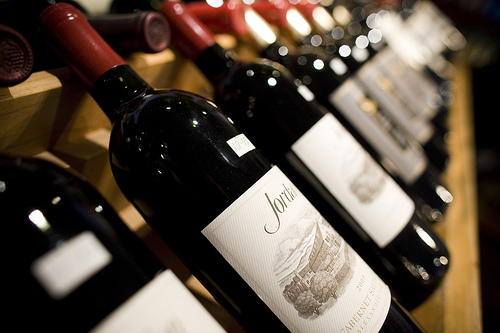

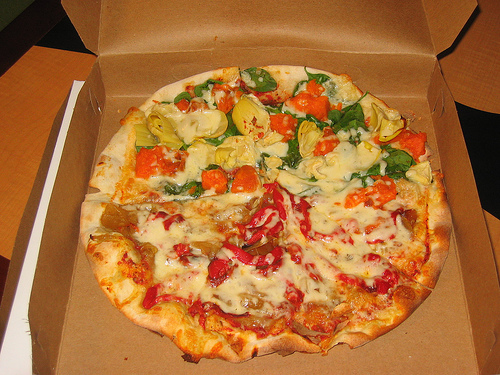

In [2]:
from simcoder.count_cats import get_best_cat_index
from simcoder.similarity import get_mf_image


cat1 = 907 # wine bottle
cat2 = 963 # pizza

# get a wine bottle and a pizza

indexes_for_cat1 = get_best_cat_index(cat1,smData)
indexes_for_cat2 = get_best_cat_index(cat2,smData)

wine_index = indexes_for_cat1[0]
pizza_index = indexes_for_cat2[0]

display(get_mf_image(wine_index))
display(get_mf_image(pizza_index))

In [3]:
from simcoder.msedOO import msed
import numpy as np

poly_query_data = np.vstack((allData[wine_index],allData[pizza_index]))


In [4]:
data_size = allData.shape[0]
msed_results = np.zeros(data_size)

base = msed(poly_query_data)


In [5]:

some_data = allData[6]
some_data = np.expand_dims(some_data, axis=0)

xx = base.msed(some_data)
xx.item()


0.41540759801864624

In [40]:
complexities =  base.msed(allData)
complexities = complexities.flatten()
indices = np.flip(np.argsort(complexities))
top_100 = indices[0:100]



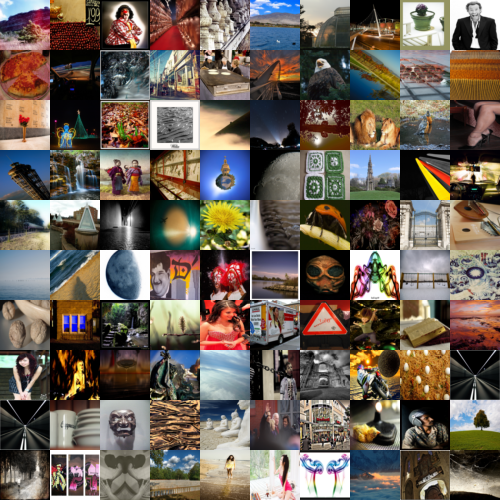

In [41]:
from simcoder.similarity import make_mf_image_grid

make_mf_image_grid(top_100,10,10,50,50)